# TFY4345 Classical Mechanics - Assignment 1
## By: Jamal Sharifi

## Task 1 A):
In this exercise, we are asked to estimate maximum range of a batted baseball with air drag and with a tailwind and headwind of 10 m/s, and the corresponding optimal angles within 1◦. We are given that the initial velocity is 50 m/s with tailwind and headwind of 10 m/s. We are also asked to find the initial velocity if the ball is to travel a distance of 168 m in the x-direction. 

I have used the EOM together with Euler's method to approximate solutions as described in detail below. 

### Trajectory of the batted ball with air drag



\begin{equation}
           \begin{pmatrix} v_{0x} \\ v_{0y}\\  \end{pmatrix} 
           = {v_0} \begin{pmatrix} cos(\theta_0)\\  sin(\theta_0)\\ \end{pmatrix}, \qquad 
           \begin{pmatrix} x_{i+1} \\ y_{i+1} \\  \end{pmatrix} 
           = \begin{pmatrix} x_i+v_{x_i} \cdot \Delta t \\ y_i+v_{y_i} \cdot \Delta t \\  \end{pmatrix}, \qquad 
           \begin{pmatrix} v_{x_{i+1}} \\ v_{y_{i+1}} \\  \end{pmatrix} 
           = \begin{pmatrix} v_{x_{i}} - \frac{B_2}{m}v_iv_{x_{i}} \cdot \Delta t \\ v_{y_i}-g\cdot \Delta t - \frac{B_2}{m}v_iv_{y_{i}} \cdot \Delta t \\  \end{pmatrix}
\end{equation}

For small $\Delta t$, where
\begin{equation*}
           \begin{pmatrix} g \\ \frac{b_{2}}{m}\\  \end{pmatrix} 
           = \begin{pmatrix} 9.81\\  0.0039 + \frac{0.0058}{1+exp[({v_i-35})/5]}\\ \end{pmatrix}
\end{equation*}
  
### Trajectory of the batted ball with tailwind and headwind

\begin{equation}
           \begin{pmatrix} v_{x_{i+1}} \\ v_{y_{i+1}} \\  \end{pmatrix} 
           = \begin{pmatrix} v_{x_{i}} - \frac{B_2}{m} \big |\vec{v_i} -\vec{v_{wind}} \big|(v_x-v_{wind}) \cdot \Delta t \\ v_{y_i}-g\cdot \Delta t - \frac{B_2}{m}\big|\vec{v_i} -\vec{v_{wind}} \big|v_y \cdot \Delta t \\  \end{pmatrix}
\end{equation}


In [8]:
import math
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import norm 

def One_A(model):
    #Finding the optimal angle. 
    angles=np.deg2rad(np.linspace(20, 50, num=31))
    max_l=0
    for i in range(len(angles)):
        current_l=trajectories(angles[i],50,0,model)[0]
        if current_l > max_l:
            max_l=current_l
            best_angle=angles[i]
    print("Optimal angle: ",np.degrees(best_angle),u"\u00B1", "1 degrees")
    
    #Finding the minimum velocity to hit a homerun.
    vel=np.linspace(0, 100, num=101)   
    for i in range(len(vel)):
        current_l=trajectories(best_angle,vel[i],0,model)[0]
        if current_l > 168:
            break
    print("Minimum velocity: ",vel[i],u"\u00B1", "1 m/s") 
    
    #Plotting the 3 trajectory with the optimal angle and minimum velocity.
    coord=trajectories(best_angle,vel[i],0,model)
    plt.plot(coord[1][0],coord[1][1],linewidth=4)           
        
def Task_1A():
    print("Batted ball with airdrag:")
    One_A("1A1")
    print("-------------------------")
    print("Batted ball with tailwind and headwind:")
    One_A("1A2")
    print("-------------------------")
    print("Batted ball with no air resistance:")
    One_A("1A3")
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlim(0,175.2)
    plt.ylim(0,50)
    plt.legend(["Airdrag", "Tail- and headwind","No air resistance"],fontsize=20)
    plt.xlabel("Range [m]", size = 30)
    plt.ylabel('Angle [deg]', size = 30)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.rcParams["figure.figsize"] = (10,6)
    
def One_B(model):
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlim(0,20)
    plt.ylim(0.1,-10)
    plt.xlabel("Range [m]", size = 30)
    plt.ylabel('Deflection [cm]', size = 30)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    coord=trajectories(0,35,0,model)[1]
    x_coord=coord[0]
    z_coord=np.array(coord[2])*100
    
    plt.plot(x_coord,z_coord,linewidth=4)
    coord=trajectories(0,35,30,model)[1]
    x_coord=coord[0]
    z_coord=np.array(coord[2])*100
    plt.plot(x_coord,z_coord,linewidth=4)
    print("Trajectory deflected into the z-direction: ", round(z_coord[-1],1)," cm")
    plt.legend([r'$\omega$'+"=0", r'$\omega$'+"=30"],fontsize=30)

def Task_1B():
    One_B("1B")
    
def One_C(model):
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlim(0,20)
    plt.ylim(0.1,46)
    plt.xlabel("Range [m]", size = 30)
    plt.ylabel('Deflection [cm]', size = 30)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    for i in range(1,6,1):
        coord=trajectories(0,35,i,model)[1]
        x_coord=coord[0]
        z_coord=np.array(coord[2])*100
        plt.plot(x_coord,z_coord,linewidth=4)

    plt.legend([r'$\omega$'+"=1", r'$\omega$'+"=2", r'$\omega$'+"=3", r'$\omega$'+"=4", r'$\omega$'+"=5"],fontsize=20)
    
def Task_1C():
    One_C("1C")
    
def Two_A():
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlim(0,70)
    plt.ylim(0,22)
    plt.xlabel("x [m]", size = 30)
    plt.ylabel('y [m]', size = 30)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    
    model_list=["2A1","2A2","2A3","2A4"]
    velocity_list=[70,70,14,14]
    legend_list=[r'$v_0=70$'+" m/s",r'$v_0=70$'+" m/s (+spin)", 
                r'$v_=14$'+" m/s (C=1/2)", r'$v_=14$'+" m/s (no spin)", ]
    
    for i in range(4):
        coord=trajectories(np.deg2rad(9),velocity_list[i],
                           0,model_list[i])[1]
        if i<2:
            plt.plot(coord[0],coord[1],linewidth=4)

        elif i>=2:
            if i==2:
                plt.legend([legend_list[0],legend_list[1]],fontsize=20)
                plt.figure()
                plt.xticks(fontsize = 20)
                plt.yticks(fontsize = 20)
                plt.xlim(0,6.6)
                plt.ylim(0,40)
                plt.xlabel("x [m]", size = 30)
                plt.ylabel('y [cm]', size = 30)
            plt.plot(coord[0],np.array(coord[1])*100,linewidth=4)
            if i==3:
                plt.legend([legend_list[2],legend_list[3]], bbox_to_anchor=(0.41,0.77),fontsize=16)

def Task_2A():
    Two_A()
    
def Two_B():
    fig = plt.figure(figsize=(15,10)).add_subplot(111,projection='3d')
    x, y = np.meshgrid(range(20), range(70))
    z = 0*x - 0*y
    fig.plot_surface(x, y, z, alpha=0.5, color="green")
    fig.axes.set_xlim3d(left=0, right=18.6) 
    fig.axes.set_ylim3d(bottom=0, top=68.5) 
    fig.axes.set_zlim3d(bottom=0, top=17) 
    fig.set_xlabel('z [m]', fontsize=15)
    fig.set_ylabel('x [m]', fontsize=15)
    fig.set_zlabel('y [m]', fontsize=15)
    fig.zaxis.set_tick_params(labelsize=12)
    fig.xaxis.set_tick_params(labelsize=12)
    fig.yaxis.set_tick_params(labelsize=12)
    
    model_list=["2B1","2B2"]
    legend_list=[r'$v_0=70$'+" m/s",r'$v_0=70$'+" m/s (+spin)"]
    
    for i in range(2):
        coord=trajectories(np.deg2rad(9),70,0,model_list[i])[1]
        fig.plot(coord[2],coord[0],coord[1],label=legend_list[i],linewidth=4)  
    
    plt.legend(fontsize=16)

def Task_2B():
    Two_B()

#In this function all the diffrent trajectories are calculated
#using Euler's method.
def trajectories(theta,v,w,model):
    if model in ["1A1","1A2","1A3","2A1","2A2",
                 "2A3","2A4","2B1","2B2"]:
        r= [[0],[0],[0]]
    if model == "1B" or model == "1C":
        r= [[0],[1.8],[0]]

    g= 9.81
    dt=0.001
    v=[v*math.cos(theta),v*math.sin(theta),0]
    i=0
    v_wind=[10,10,0]
    sm=4.1*10**(-4)
    
    if model in ["2A1","2A3","2B1"]:
        swm=0.25
    if model in ["2A2","2B2"]:
        swm=0.25*1.5
    if model in ["2A4"]:
        swm=0
    
    while r[1][i]>0 or i==0:
        if norm(v,2)<=14:
            C=1/2
        if norm(v,2)>14:
            C=7/norm(v,)
        #(C*rho*A)/m=(0.006*1.225/0.046)*C=0.15978*C
        C_rho_A_m=0.15978*C 
        bm=0.0039+0.0058/(1+math.exp((norm(v,2)-35)/5))
       
        #Position coordinates
        r[0].append(r[0][i]+v[0]*dt)
        r[1].append(r[1][i]+v[1]*dt)
        r[2].append(r[2][i]+v[2]*dt)
        
        #x-velocities.
        if model in ["1A1", "1B", "1C"]:
            v[0] = v[0]-bm*v[0]*norm(v,2)*dt
        if model == "1A2":
            v[0]=v[0]-bm*(norm(np.subtract(v,v_wind),2)*(v[0]-norm(np.array(v_wind),2)))*dt
        if model == "1A3":
            v[0]=v[0]
        if model in ["2A1","2A2","2A3","2A4",
                     "2B1","2B2"]:
            v[0]=v[0]-(C_rho_A_m*(v[0]**2)+swm*v[1])*dt 
        
        #y-velocities.
        if model == "1A1":
            v[1]= v[1]-g*dt-bm*v[1]*norm(v,2)*dt 
        if model == "1A2":
            v[1]=v[1]-g*dt-(bm*norm(np.subtract(v,v_wind),2)*v[1])*dt
        if model in ["1A3", "1B", "1C"]:
            v[1]=v[1]-g*dt
        if model in ["2A1","2A2","2A3","2A4"]:
            v[1]=v[1]+(swm*v[0]-g-C_rho_A_m*(v[1]**2))*dt  
        if model in ["2B1","2B2"]:
            v[1]=v[1]+(swm*(v[0]-v[2])-g-C_rho_A_m*(v[1]**2))*dt 
        
        #z-velocities.
        if model in ["1A1","1A2","1A3"]:
            v[2]= 0
        if model == "1A3" or model == "1B":
            v[2]=v[2]-sm*v[0]*w*dt
        if model == "1C":
            a_z=0.5*g*(math.sin(4*theta)-0.25*math.sin(8*theta)+0.08*math.sin(12*theta)-0.025*math.sin(16*theta))
            v[2]=v[2]-sm*v[0]*w*dt+a_z*dt
            theta=theta+w*dt
        if model in ["2B1","2B2"]:
            v[2]=v[2]+swm*(v[1])*dt
        
        #If the object is below y=0, the loop is terminated.
        if r[1][i]<0:
            break
        i=i+1
    
    #Range of the object. Average of y_i above y=0 and y_i+1 below y=0.
    x_l=(r[0][i-1]+r[0][i])/2

    return x_l,r

Batted ball with airdrag:
Optimal angle:  36.0 ± 1 degrees
Minimum velocity:  63.0 ± 1 m/s
-------------------------
Batted ball with tailwind and headwind:
Optimal angle:  45.0 ± 1 degrees
Minimum velocity:  49.0 ± 1 m/s
-------------------------
Batted ball with no air resistance:
Optimal angle:  45.0 ± 1 degrees
Minimum velocity:  41.0 ± 1 m/s


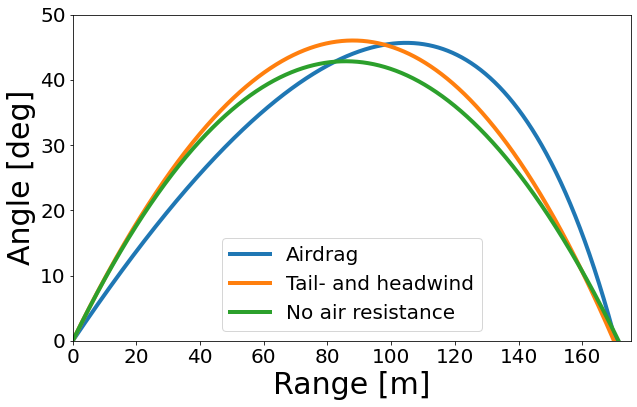

In [10]:
Task_1A()

## Task 1 B):
In this exercise, we examine the trajectory of a pitched ball. First, we look at a ball being thrown horizontally in the x-direction at a height of y=1.8 m with an initial velocity of 35 m/s and an initial angle of 0 degree. Next case is that an rotation is added to the ball y-direction of 30 rev/s. Finaly, we find the trajectory of both cases and compare. 

The scheme for this task is described below.  

### Trajectory of the pitched ball


\begin{equation}
           \begin{pmatrix} v_{0x} \\ v_{0y}\\ v_{0z}\\ \end{pmatrix} 
           = {v_0} \begin{pmatrix} cos(\theta_0)\\  sin(\theta_0)\\ 0\\ \end{pmatrix}, \qquad 
           \begin{pmatrix} x_{i+1} \\ y_{i+1} \\ z_{i+1} \\ \end{pmatrix} 
           = \begin{pmatrix} x_i+v_{x_i} \cdot \Delta t \\ y_i+v_{y_i} \cdot \Delta t \\ y_i+v_{y_i} \cdot \Delta t \\ \end{pmatrix}, \qquad 
           \begin{pmatrix} v_{x_{i+1}} \\ v_{y_{i+1}} \\ v_{y_{i+1}} \\ \end{pmatrix} 
           = \begin{pmatrix} v_{x_{i}} - \frac{B_2}{m}v_iv_{x_{i}} \cdot \Delta t \\ v_{y_i}-g\cdot \Delta t  \\ v_{z_i}- \frac{S_0}{m}v_{x_{i}} \omega \Delta t \\ \end{pmatrix}
\end{equation}

Where
\begin{equation*}
           \begin{pmatrix} g \\ \frac{b_{2}}{m}\\  \frac{S_0}{m} \\ \end{pmatrix} 
           = \begin{pmatrix} 9.81\\  0.0039 + \frac{0.0058}{1+exp[({v_i-35})/5]}\\ 4.1 \cdot 10^{-4}\\ \end{pmatrix}
\end{equation*}
  


Trajectory deflected into the z-direction:  -7.5  cm


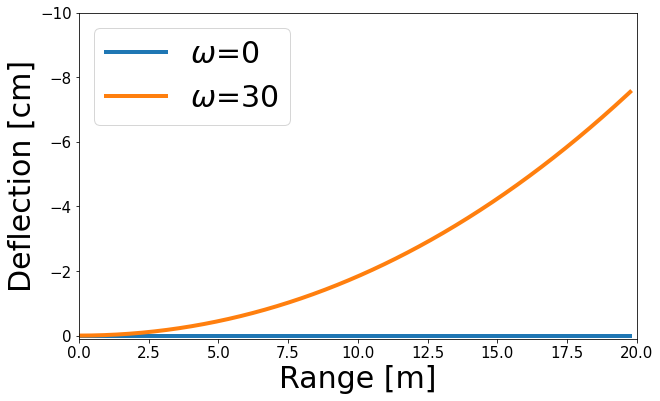

In [11]:
Task_1B()

## Task 1 C):
In this exercise, we examine the trajectory of knuckleballs by adding an lateral force to the EOM from pitched balls. By varing the angular velocity with small increments one can see different trajectories.


The ball is again thrown in the horizontal at a height of y=1.8 m with an initial velocity of 35 m/s and an initial angle of 0 degree. Next, we add small changes to the angular velocity and plot the different trajectories.  

### Trajectories of knuckleballs


\begin{equation}
           \begin{pmatrix} v_{0x} \\ v_{0y}\\ v_{0z}\\ \end{pmatrix} 
           = {v_0} \begin{pmatrix} cos(\theta_0)\\  sin(\theta_0)\\ 0\\ \end{pmatrix}, \qquad 
           \begin{pmatrix} x_{i+1} \\ y_{i+1} \\ z_{i+1} \\ \end{pmatrix} 
           = \begin{pmatrix} x_i+v_{x_i}  \Delta t \\ y_i+v_{y_i} \Delta t \\ y_i+v_{y_i} \Delta t \\ \end{pmatrix}, \qquad 
           \begin{pmatrix} v_{x_{i+1}} \\ v_{y_{i+1}} \\ v_{y_{i+1}} \\ \end{pmatrix} 
           = \begin{pmatrix} v_{x_{i}} - \frac{B_2}{m}v_iv_{x_{i}}  \Delta t \\ v_{y_i}-g \Delta t  \\ v_{z_i}- \frac{S_0}{m}v_{x_{i}} \omega \Delta t +a_z \Delta t\\ \end{pmatrix}
\end{equation}

Where $a_z = \frac{g}{2} \big(sin(4\theta)-0.25sin(8\theta)+0.08sin(12\theta)-0.0025sin(16\theta)\big) $ and
\begin{equation*}
           \begin{pmatrix} g \\ \frac{b_{2}}{m}\\  \frac{S_0}{m} \\ \end{pmatrix} 
           = \begin{pmatrix} 9.81\\  0.0039 + \frac{0.0058}{1+exp[({v_i-35})/5]}\\ 4.1 \cdot 10^{-4}\\ \end{pmatrix}
\end{equation*}
  


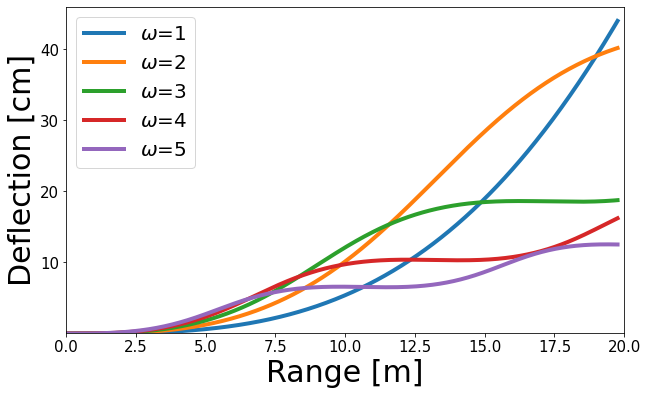

In [12]:
Task_1C()

## Task 2 A):
We now excamen the trajectories of a golf ball. In this exercise we look at 4 different trajectories. 2 at high initial velocity of 70 m/s two cases of low velocity trajectories with 14 m/s initial velocity. For the high velocity we look at a trajectory of a golf ball with some backspin and one with 50% more backspin. And for the low velocity, we look at a trajectory with spin and a trajectory without spin. Initial angle is 9 degrees.


### Trajectory of a golf ball with an additional  spin direction


\begin{equation}
           \begin{pmatrix} v_{0x} \\ v_{0y} \\ \end{pmatrix} 
           = {v_0} \begin{pmatrix} cos(\theta_0)\\  sin(\theta_0)\\ \end{pmatrix}, \qquad 
           \begin{pmatrix} x_{i+1} \\ y_{i+1}  \\ \end{pmatrix} 
           = \begin{pmatrix} x_i+v_{x_i}  \Delta t \\ y_i+v_{y_i} \Delta t  \\ \end{pmatrix}, \qquad 
           \begin{pmatrix} v_{x_{i+1}} \\ v_{y_{i+1}}  \\ \end{pmatrix} 
           = \begin{pmatrix} v_{x_{i}}-\big(C\rho Av_{x_{i}}^2 + \frac{S_0 \omega}{m}v_{y_{i}}\big)  \Delta t \\ v_{y_{i}}+ \big(\frac{S_0 \omega}{m}v_{x_{i}}-g - C\rho Av_{y_i}^2\big) \Delta t  \\ \end{pmatrix}
\end{equation}

Where $\rho$ (1.225 kg$m^{-3}$)  is air density at sea level $^1$, C (1/2 for v<14 m/s and 7/v for higher velocities) drag force coefficient, A is the surface area of the ball ($\pi$ r^2 =$\pi$ $(0.043)^2$ ) $^2$ and m(0.046 kg)$^3$ is the mass of the ball.
\begin{equation*}
           \begin{pmatrix} g \\  \frac{S_0 \omega}{m} \\ \end{pmatrix} 
           = \begin{pmatrix} 9.81 \\ 0.25\\ \end{pmatrix}
\end{equation*}
  

----------------------
Sources: 

[1] Air density at sea level: https://en.wikipedia.org/wiki/Density_of_air 

[2] Golf ball radius: https://www.golfsidekick.com/balls/golf-ball-size/ 

[3] Golf ball mass: https://honestgolfers.com/golf-ball-weight/#:~:text=In%20order%20to%20compete%20in,and%20R%26A%20golf%20governing%20boards. 

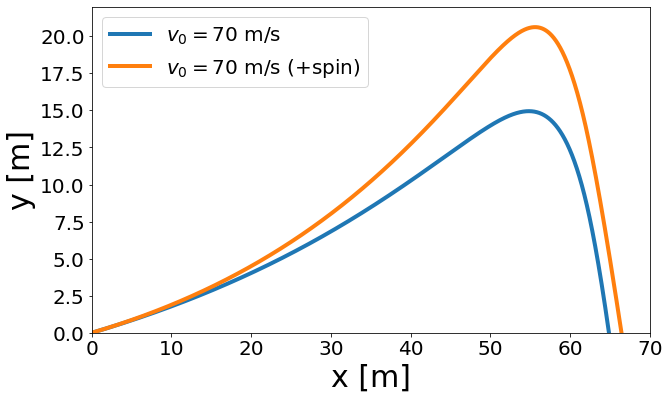

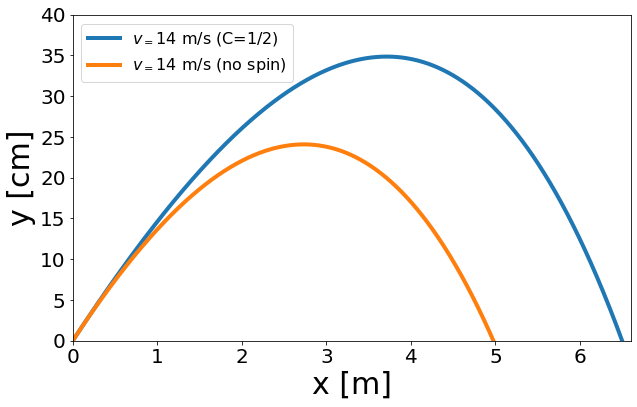

In [13]:
Task_2A()

## Task 2 B):
We now examen the trajectories in 3 dimensions. Since the ball has an additional spin in the x-direction we get the EOM below.  

### Trajectory of a golf ball with an aditional spin direction

\begin{equation}
           \begin{pmatrix} v_{0x} \\ v_{0y} \\ v_{0z} \\ \end{pmatrix} 
           = {v_0} \begin{pmatrix} cos(\theta_0)\\  sin(\theta_0)\\ 0\\ \end{pmatrix}, \qquad 
           \begin{pmatrix} x_{i+1} \\ y_{i+1}  \\ z_{i+1}  \\ \end{pmatrix} 
           = \begin{pmatrix} x_i+v_{x_i}  \Delta t \\ y_i+v_{y_i} \Delta t  \\ z_i+v_{z_i} \Delta t  \\ \end{pmatrix}, \qquad 
           \begin{pmatrix} v_{x_{i+1}} \\ v_{y_{i+1}}  \\ v_{z_{i+1}}  \\ \end{pmatrix} 
           = \begin{pmatrix} v_{x_{i}}-\big(C\rho Av_{x_{i}}^2 + \frac{S_0 \omega}{m}v_{y_{i}}\big)  \Delta t \\ v_{y_{i}}+ \big(\frac{S_0 \omega}{m}(v_{x_{i}}-v_{z_{i}})-g - C\rho Av_{y_i}^2\big) \Delta t  \\ v_{z_{i}} + \big(\frac{S_0 \omega}{m}v_{y_{i}} \Delta t \big)\\ \end{pmatrix}
\end{equation}

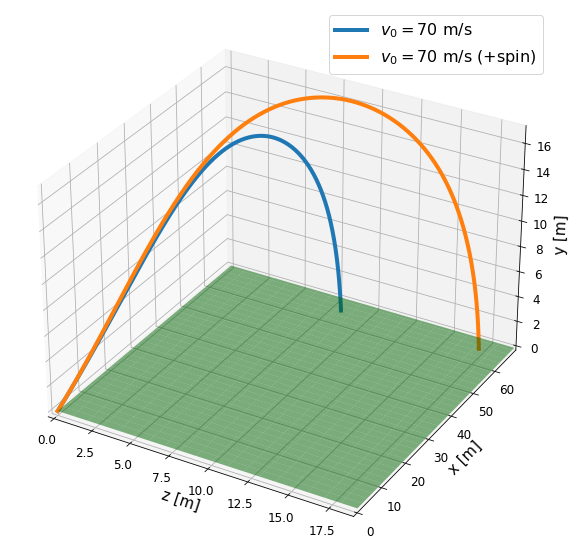

In [14]:
Task_2B()